# Rough Analysis
### [RN] 12:45 PM 03/01/2021

We want to figure out what kind of parameters to focus on, and what to look for in literature to effectively narrow in on cosmic ray frequency dependence on various parameters. 

I ended up adding another script to scrape weather twice an hour due to inconsistencies in my initial system. This gives me one big text file with all the weather, starting 2/23. 

I have a few levels of resulution for this data already due to how i set up data collection: 

A. The hourly average rate and the total weather scraped data. This gives me resolution down to the hour, by incidents per minute average of the hour. 

B. The incidents per minute for each minute of each hour of collection. 

C. The time stamp of each individual incident.

There are some gaps in weather collection due to loss of internet. I can attribute this to random error. 

Of course A will be easier to deal with. This will be analysis couplign the "AllWeather.txt" and "TotalOverTime.txt" to make some histograms. I should start here. 

I will need to keep updated versions of these files in my working directory. 

Remember, this is the order of the data for each line in the TotalOverTime.txt:

    -DATA: mean of events per minute, standard deviation, variance, range -CONDITIONS: Day of month, Time of data collection, Wind speed (kph), Visibility (km), Weather, Sky COnditions, Air Temp (C), Dewpoint (C), 6 Hour Max Temp, 6 Hour Min Temp, Relative Humidity (%), Wind Chill (C), Heat Index (C), Alitimeter Pressure (cm), Sea Level (mb), Precipitation 1h r (cm), Precipitation 3hr (cm), Precipitation 6h (cm) 


In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def ReadFile(infile): # read infile, return contents list of each line
    read = open(infile, 'r')
    lines = read.readlines()
    read.close()
    return(lines)

In [83]:
### Import data 

f_scrape="AllWeather.txt"
f_data="TotalOverTime.csv"

raw_scrape = ReadFile(f_scrape)[2:] # remove headers 
raw_data = ReadFile(f_data)[3:] # remove headers

# now i have raw data arrays for weather and the events per minute. 


In [84]:
### split raw data 
# this set starts on 2/16 at 4 pm and ends 3/1 at 11 am. 
# using t[] in scipy library on data collection end 

n = len(raw_data)
avg, std, var, rng = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
measure_date = []
for i in range(len(raw_data)):
    s0 = raw_data[i].split("---") # this marker divides different sections in line
    d = s0[1].split("_Hour")
    datetime=d[0][:3] + "/" + d[0][3:] + "/21 " + d[1].strip() + ":00:00" # date in same format as AllWeather
    measure_date.append(datetime)
    s2 = s0[2].split(' ') # now extract the incident data 
    IPM_mean = s2[2][:len(s2[2])-1] # average incidents per minute across hour
    IPM_sigma = s2[3][:len(s2[3])-1] # standard deviation of average incidents per min across hour
    IPM_var = s2[4][:len(s2[4])-1] # variance incidence per minute across hour 
    IPM_range = s2[5][:len(s2[5])-1]
    avg[i] = IPM_mean
    std[i] = IPM_sigma
    var[i] = IPM_var
    rng[i] = IPM_range
    

    

In [165]:
### split weather scraped data

m = len(raw_scrape)

scrape_date, collect_date, wind, visibility, weather = [], [], [], [], [], 
sky, T, Dp, humidity = [], [], [], [], 
heat_index, P_altimeter, P_sealev, prec_1hr = [], [], [], [], 
count = 0
for i in range(len(raw_scrape)):
    s0 = raw_scrape[i].split("(scraped):")
    scrape = s0[0]
    dt = scrape.split(",")
    datetime = dt[0] + dt[1]
    cond = s0[1].split(", ")
    cd = datetime[:3] + cond[0].strip() + "/21 " + cond[1].strip() + ":00"
    try:
        if str(collect_date[count].strip()) == str(cd.strip()):
            continue
        else:
            count = count + 1
    except:
        pass
    collect_date.append(cd)
    scrape_date.append(datetime)
    wind.append(cond[2])
    visibility.append(cond[3])
    weather.append(cond[4])
    sky.append(cond[5])
    T.append(cond[6])
    Dp.append(cond[7])
    humidity.append(cond[10].strip('%'))
    P_altimeter.append(cond[13])
    P_sealev.append(cond[14])

    
# get absolute value of wind 
wind_abs = np.zeros(len(wind)) # speed of wind, no direction 
for i in range(len(wind)):
    vals = ''
    test = wind[i]
    count = 0
    for j in range(len(test)):
        try:
            a = float(test[j])
            vals = vals + str(int(a))
        except:
            count = count +1 
            if count >1:
                    break
    try:
        wind_abs[i] = float(vals)
    except:
        wind_abs[i] = 0



['27']
['27', '22']
['27', '22', '28']
['27', '22', '28', '34']
['27', '22', '28', '34', '50']
['27', '22', '28', '34', '50', '65']
['27', '22', '28', '34', '50', '65', '72']
['27', '22', '28', '34', '50', '65', '72', '72']
['27', '22', '28', '34', '50', '65', '72', '72', '74']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74', '71']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74', '71', '71']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74', '71', '71', '73']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74', '71', '71', '73', '76']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74', '71', '71', '73', '76', '']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74', '71', '71', '73', '76', '', '74']
['27', '22', '28', '34', '50', '65', '72', '72', '74', '74', '74', '7

Text(0.5, 1.0, 'Histogram of Avg Events Per Min by Day')

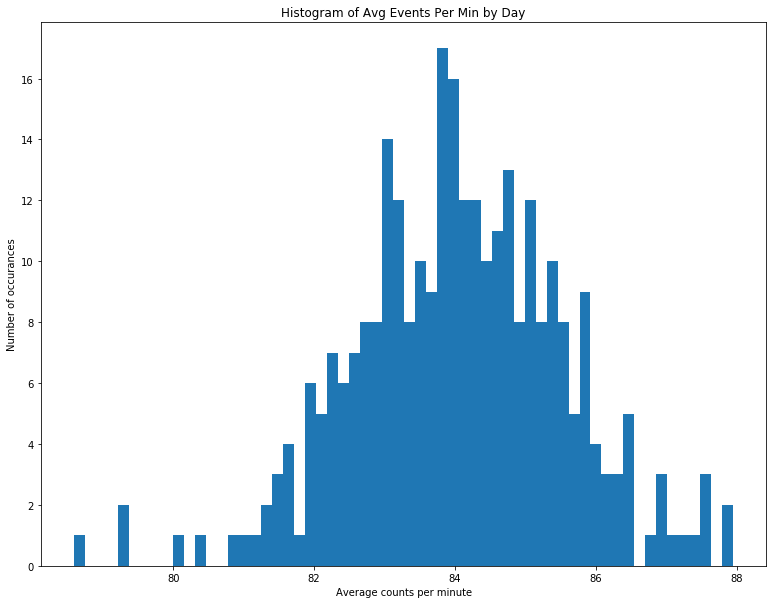

In [86]:
# Make some plots 

plt.rcParams['figure.figsize'] = [13, 10]

x = np.linspace(1, len(date), len(date))

fig1, axs1 = plt.subplots()
axs1.hist(avg, bins = 60)
plt.xlabel("Average counts per minute")
plt.ylabel("Number of occurances")
plt.title("Histogram of Avg Events Per Min by Hour")


### [RN] 1:57 

I would like to break the data up into different histograms and see if I can find a pattern in the distrubutions. Perhaps discrete normal distrbutions around different averaages for days that are windy versus not, or high and low pressure days. I will work on breaking up the data in different ways to test this. 

This looks like it is not truly a normal distribution which is encouraging to us in that we can couple it with some weather condition. 
Ideas: 
- Histogram and line plot of average of hits per hour to get time profile over day 
- histogram of every hits per minute measurement 
- overlaid with weather data 
- histogram of dat
- bar plot color coded by weather 

I want to do day averages next. I will propogate standard dev on the average events per minute for each hour by (assuming 24 hours and 24 data points per day, some may have less due to glitches): 

$\sigma_{day} = \frac{\sqrt{\sum_{n=1}^{24} \sigma_{hour}^2}}{24}$


In [87]:
### recreate histogram for day average 

days, day_stats = ["02/16"], []  # start on first day of collection 
running_avg, running_stdSq = [], []
count = 0
for i in range(1, len(avg)):
    date = measure_date[i][:6]    
    if str(date).strip() == str(days[count]).strip(): # if the day we are on now is same as yesterday 
        running_avg.append(avg[i])
        running_stdSq.append(float(std[i])**2)
    else:
        x = sum(running_avg)/len(running_avg)
        sigma = ((sum(running_stdSq))**(0.5))*(1/len(running_stdSq)) # propogating standard deviation on each hour 
        day_stats.append([date, x, sigma])
        days.append(date)
        running_avg, running_stdSq = [], []
        count = count + 1
print(day_stats)
print("I expect 13 days total excluding partial first 2/16, and including today 3/1. I got ", len(day_stats), " data points by distilling data into days.")



[[' 02/17', 84.04523809523809, 3.587363161075386], [' 02/18', 83.64549180327869, 2.6958594304227548], [' 02/19', 83.33077928248991, 1.9736820221120535], [' 02/20', 84.10487051556188, 2.096765638052274], [' 02/21', 83.40077215490615, 2.0798339966699824], [' 02/22', 83.54309812306961, 1.9357892735497304], [' 02/23', 83.28985507246377, 1.935948219071465], [' 02/24', 84.0388096935139, 2.0647996552692782], [' 02/25', 83.75244713708722, 2.081830385671301], [' 02/26', 83.84539082917557, 2.1489169376309456], [' 02/27', 85.82407935376577, 1.9725232408264999], [' 02/28', 85.1908172962699, 2.1535775360436644], [' 03/01', 84.47832026609646, 2.0589524602175273]]
I expect 13 days total excluding partial first 2/16, and including today 3/1. I got  13  data points by distilling data into days.


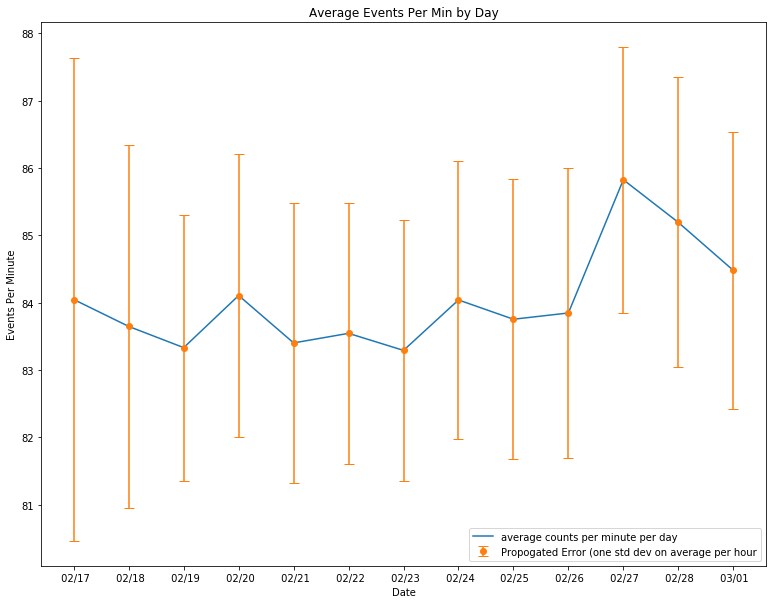

In [98]:
fig2, axs2 = plt.subplots()
avg_day, std_day = np.zeros(len(day_stats)), np.zeros(len(day_stats))
day_days = []
for i in range(len(avg_day)):
    day_days.append(day_stats[i][0])
    avg_day[i] = day_stats[i][1]
    std_day[i] = day_stats[i][2]  
axs2.plot(day_days, avg_day, label = "average counts per minute per day")
plt.title("Average Events Per Min by Day")
plt.xlabel("Date")
plt.ylabel("Events Per Minute")
plt.errorbar(day_days, avg_day, yerr=std_day, capsize=5, fmt='o', label = "Propogated Error (one std dev on average per hour")
plt.legend()



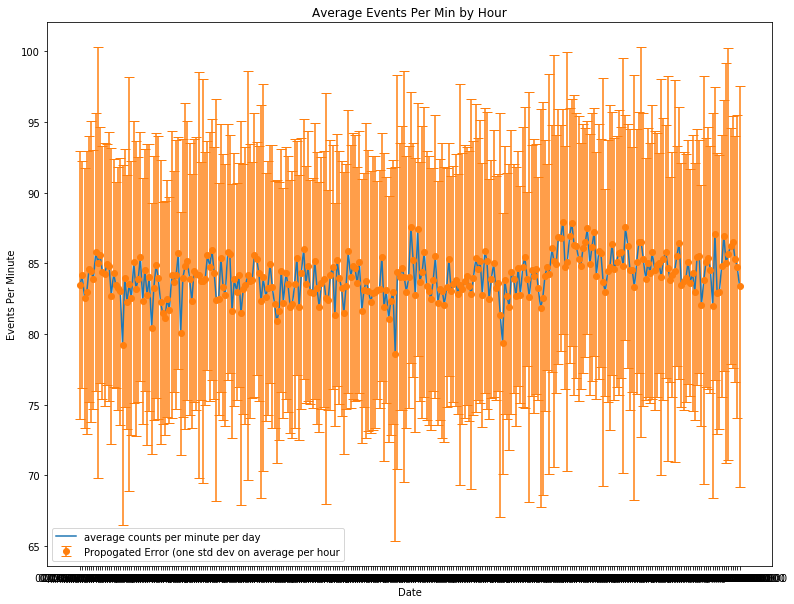

In [100]:
fig3, axs3 = plt.subplots()
axs3.plot(measure_date, avg, label = "average counts per minute per day")
plt.title("Average Events Per Min by Hour")
plt.xlabel("Date")
plt.ylabel("Events Per Minute")
plt.errorbar(measure_date, avg, yerr=std, capsize=5, fmt='o', label = "Propogated Error (one std dev on average per hour")
plt.legend()



In [110]:
### Look for patterns over day 

hours, hour_stats = np.linspace(1, 24, 24), []  # start on first day of collection 
running_avg, running_stdSq = [], []
count = 0
for i in hours:
    search = str(int(i))+":00:00"
    for j in range(len(avg)):
        if measure_date[j].find(search) !=-1:
            running_avg.append(avg[j])
            running_stdSq.append(std[j]**2)
        else:
            pass
    m = sum(running_avg)/len(running_avg)
    sigma = ((sum(running_stdSq))**(0.5))*1/len(running_stdSq)
    hour_stats.append([search, m, sigma])
    running_avg, running_stdSq = [], []
   
print(hour_stats)

print("I expect 24 data points for 24 hours in a day, I got ", len(hour_stats) , " points.")

[['1:00:00', 83.7398464037808, 1.6086788821158453], ['2:00:00', 83.76343228474374, 1.655329157009619], ['3:00:00', 83.95729582041055, 1.6162713415109216], ['4:00:00', 84.41435944140862, 1.6785973349309704], ['5:00:00', 84.23989071038253, 2.042167901795801], ['6:00:00', 83.9368743169399, 2.041546873150126], ['7:00:00', 84.32975956284153, 1.9405913570936184], ['8:00:00', 84.29241530054645, 1.9191276536984572], ['9:00:00', 84.09101639344263, 1.9284164576845888], ['10:00:00', 84.05277777777778, 2.8016241030094875], ['11:00:00', 84.3306238615665, 3.0416384581251887], ['12:00:00', 83.75368852459017, 2.9349731248297624], ['13:00:00', 84.33624772313296, 2.988991732762889], ['14:00:00', 84.63194444444444, 2.814253568559192], ['15:00:00', 84.26737249544627, 2.8064529252092245], ['16:00:00', 83.90641025641025, 2.582176952947655], ['17:00:00', 83.9854140395124, 2.5640940930745435], ['18:00:00', 83.31361916771753, 2.7976875290424754], ['19:00:00', 83.6803488860866, 2.7428920594878714], ['20:00:00',

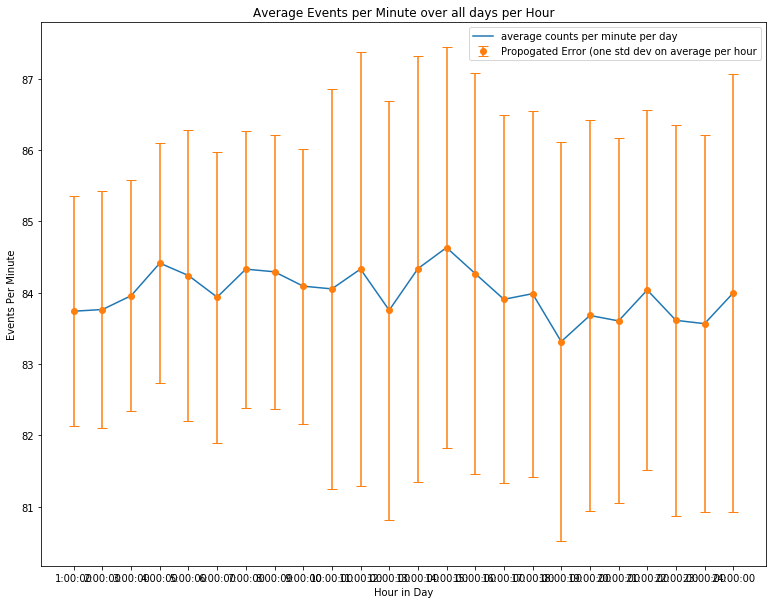

In [113]:
fig4, axs4 = plt.subplots()
avg_hour, std_hour = np.zeros(len(hour_stats)), np.zeros(len(hour_stats))
hour_hours = []
for i in range(len(avg_hour)):
    hour_hours.append(hour_stats[i][0])
    avg_hour[i] = hour_stats[i][1]
    std_hour[i] = hour_stats[i][2]  
axs4.plot(hour_hours, avg_hour, label = "average counts per minute per day")
plt.title("Average Events per Minute over all days per Hour")
plt.xlabel("Hour in Day")
plt.ylabel("Events Per Minute")
plt.errorbar(hour_hours, avg_hour, yerr=std_hour, capsize=5, fmt='o', label = "Propogated Error (one std dev on average per hour")
plt.legend()


### [RN] 2:53 pm 

I want to encode weather data. 

I will use opacity to encode the magnitude of parameters, normalized to the max is alpha=100. 

I will use arrays with the same indexes to do all of this. 

I will start on 2/23 when I started scraping all the weather data. 


In [239]:
### Encode weather data 

# filter measured data to remove measurements I dont have weather data for 
# coupled is array of arrays : [measured date, collect date, average IPM, std IPM, wind, sea level pressure, temperature, humidity]

coupled = []
for i in range(len(measure_date)):
    search = measure_date[i].split(":")[0]+":"
    for j in range(len(collect_date)):
        if collect_date[j].strip().find(search.strip()) != -1:
            out = [measure_date[i], collect_date[j], avg[i], std[i], wind_abs[j], P_sealev[j], T[j], humidity[j]]
            coupled.append(out) # weather data is collected at xx:53 and collection starts at xx:00
            break
        else:
            pass

rng_wind = max(wind_abs)-min(wind_abs)
max_wind = max(wind_abs)
min_wind = min(wind_abs)

def AllFloat(vals):
    for i in range(len(vals)):
        try:
            vals[i] = float(vals[i])
        except:
            vals[i] = 0
    return vals 

def NonZerMin(vals):
    temp = []
    for i in range(len(vals)): 
        if float(vals[i]) !=0 :
            temp.append(vals[i])
    return min(temp)
P_sealev = AllFloat(P_sealev)
humidity = AllFloat(humidity)
T = AllFloat(T)

rng_P_sealev = max(P_sealev)-NonZerMin(P_sealev)
max_P_sealev = max(P_sealev)
min_P_sealev = NonZerMin(P_sealev)

rng_T = max(T) - NonZerMin(T)
max_T = max(T)
min_T = NonZerMin(T)

rng_humidity = max(humidity) - NonZerMin(humidity)
max_humidity = max(humidity)
min_humidity = NonZerMin(humidity)

# generate tags 

min_alpha = 0.1
tagged = [] # array of arrays : [timestamp, mean IPM, std IPM, wind alpha, sealevel pressure alpha, T alpha, humidity alpha]
for i in range(len(coupled)): 
    look = coupled[i]
    timestamp = look[0] # timestamp by the time of start data collection 
    mean = look[2]
    sigma = look[3]
    T_alpha = (look[6]-min_T)/rng_T
    P_alpha = (look[5]-min_P_sealev)/rng_P_sealev
    H_alpha = (look[7]-min_humidity)/rng_humidity
    W_alpha = (look[4]-min_wind)/rng_wind
    out = [timestamp, mean, sigma, (W_alpha)*(1-min_alpha) +min_alpha, (P_alpha*(1-min_alpha))+min_alpha, (T_alpha*(1-min_alpha))+min_alpha, (H_alpha*(1-min_alpha))+min_alpha]
    tagged.append(out)
    

    
    
    
    

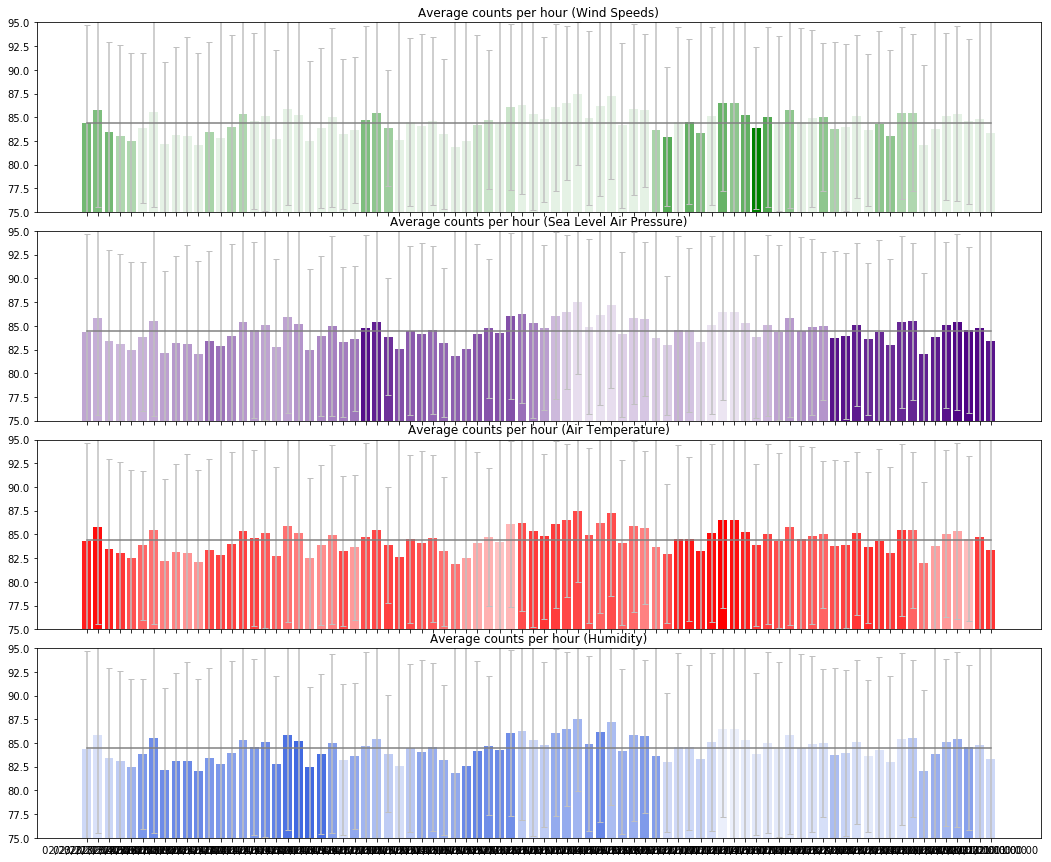

In [240]:

plt.rcParams['figure.figsize'] = [18, 15]

fig5, axs5 = plt.subplots(4, sharex=True, gridspec_kw={'hspace':0.1})
X=[]
AVG = []
# temp is red, sea level pressure is indigo, humidity is royalblue, wind is green
for i in range(len(tagged)):
    look = tagged[i]
    x = look[0]
    X.append(x)
    mean = look[1]
    AVG.append(mean)
    sigma = look[2]
    axs5[0].bar(x, mean, yerr = sigma, ecolor = "silver", capsize=3, color = 'green', alpha = look[3])
    axs5[1].bar(x, mean, yerr = sigma, ecolor = "silver", capsize=3, color = "indigo", alpha = look[4])
    axs5[2].bar(x, mean, yerr = sigma, ecolor = "silver", capsize=3, color = "red", alpha = look[5])
    axs5[3].bar(x, mean, yerr = sigma, ecolor = "silver", capsize=3, color = "royalblue", alpha=look[6])

avgavg = sum(AVG)/len(AVG)
AVG=[]
for i in X:
    AVG.append(avgavg)
axs5[0].set_title("Average counts per hour (Wind Speeds)")
axs5[0].set_ylim(75, 95)
axs5[0].plot(X, AVG, color = "gray")
axs5[1].set_title("Average counts per hour (Sea Level Air Pressure)")
axs5[1].set_ylim(75, 95)
axs5[1].plot(X, AVG, color = "gray")
axs5[2].set_title("Average counts per hour (Air Temperature)")
axs5[2].set_ylim(75, 95)
axs5[2].plot(X, AVG, color = "gray")
axs5[3].set_title("Average counts per hour (Humidity)")
axs5[3].set_ylim(75, 95)
axs5[3].plot(X, AVG, color = "gray")
    

### [RN] 4:37

I see temperature dependence. This is at least partly due to the nature of the electronics 

82


Text(0.5, 1.0, 'Average counts per hour (Humidity)')

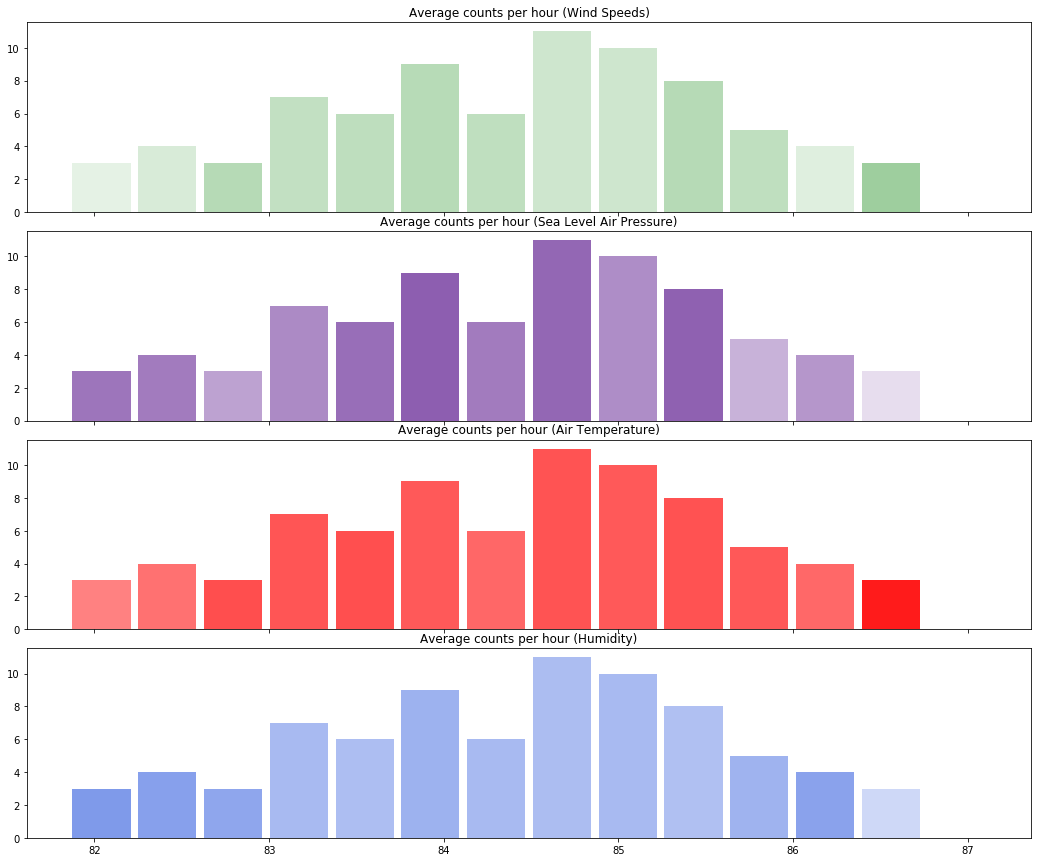

In [242]:
### color coded histogram

def MyHist(tagged, bins, min_alpha):
    AVG, STD  = [], []
    for i in range(len(tagged)):
        look = tagged[i]
        x = look[0]
        mean = look[1]
        sigma = look[2]
        AVG.append(mean)
        STD.append(sigma)
    rng = max(AVG) - min(AVG)
    bin_size = rng/bins
    count = 0
    hist = [] # array of array: [center, fullness, wind alpha, sealevel pressure alpha, T alpha, humidity alpha]
    for i in range(bins-1):
        ul = min(AVG) + bin_size*(i+1)
        ll = min(AVG) + bin_size*i
        center = (ul+ll)*0.5
        wa, pa, ta, ha = [], [], [], []
        for j in range(len(tagged)):
            if AVG[j] < ul:
                if AVG[j] > ll:
                    look = tagged[j]
                    count = count +1
                    wa.append(look[3])
                    pa.append(look[4])
                    ta.append(look[5])
                    ha.append(look[6])
        try:
            W_alpha = sum(wa)/len(wa)
        except ZeroDivisionError:
            W_alpha = min_alpha
        try:
            P_alpha = sum(pa)/len(pa)
        except ZeroDivisionError:
            P_alpha = min_alpha
        try:
            T_alpha = sum(ta)/len(ta)
        except ZeroDivisionError:
            T_alpha = min_alpha
        try:
            H_alpha = sum(ha)/len(ha)
        except ZeroDivisionError:
            H_alpha = min_alpha
        out = [center, count, W_alpha, P_alpha, T_alpha, H_alpha]
        hist.append(out)
        count = 0
    return hist
print(len(tagged))
bins = 15
hist = MyHist(tagged, bins, 0)
fig6, axs6 = plt.subplots(4, sharex=True, gridspec_kw={'hspace':0.1})
for i in range(len(hist)):
    look = hist[i]
    x = look[0]
    X.append(x)
    fullness = look[1]
    axs6[0].bar(x, fullness, width=(5/bins), color = 'green', alpha = look[2])
    axs6[1].bar(x, fullness, width=(5/bins),color = "indigo", alpha = look[3])
    axs6[2].bar(x, fullness, width=(5/bins),color = "red", alpha = look[4])
    axs6[3].bar(x, fullness, width=(5/bins),color = "royalblue", alpha=look[5])

axs6[0].set_title("Histogram: Average Events per Minute over an Hour (Wind Speeds)")

axs6[1].set_title("Histogram: Average Events per Minute over an Hour (Sea Level Air Pressure)")

axs6[2].set_title("Histogram: Average Events per Minute over an Hour (Air Temperature)")

axs6[3].set_title("Histogram: Average Events per Minute over an Hour  (Humidity)")

    

## Conclusions
### [RN] 5:07

Dependencacies to potentially ivnestigate are: 

a.  **Direct correlation between temperature and counts:**   Bin associated to highest number of average counts per min also averagies highest temperatre, this is probably due to the nature of the electronic. Is it only due to electronic reasons or does lit show association with ground temperature? 

b. **Wind speed:** Less clear vut it looks like higher wind speed has to do with more counts, since leftmost on wind (green)hist is lightest bin, rightmost is darkest and that corresponds to highest wing speeds

c. **Humidity:** It apears that lower higher humidity corresponds to lower average counts per minute while the lowest humidity is seen for the bin representing most average counts per minute. Perhaps the humidity increases air density which decrases the rate of cosmic ray incidents? This would be a good thing to look at. 

d. **Air Pressure:** This seeems to have the least correlation, as the darkeest purpose bars are about in the middle. The variation in air pressure here is very small, which is unsuprising due to the stability of weather here. This is probably the worst parameter to look at, so i was wrong there. 